In [ ]:
# Create a dataset of waves for 2.834

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

import Dataset_tools as dt



Constraints should be [0,0]: [0. 1.]


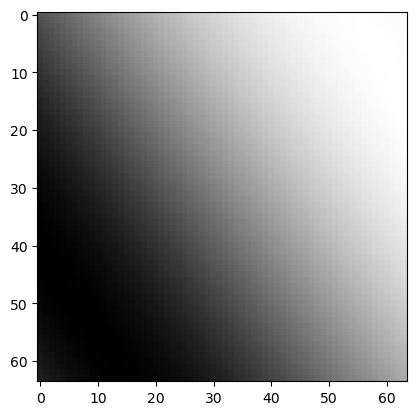

In [ ]:
#test Wave Class

path = "./dataset/test/"

isExist = os.path.exists(path)
if not isExist:
    os.makedirs(path)

params = dt.Gen_Rnd_Wave_Set(1,4) #np.array([[[100, 2.0,-np.pi/4,0,150]]])
wave = dt.Wave(params[0])
#print(wave.num_waves)
#print(wave.Vec)

print('Constraints should be [0,0]: ' + str(wave.check_constraints()))

img = wave.Gen_Image(256, path,'img_0')
plt.imshow(img,cmap='gray')

img = wave.Gen_Image(128, path,'img_1')
plt.imshow(img,cmap='gray')

img = wave.Gen_Image(64, path,'img_2')
plt.imshow(img,cmap='gray')

np.save(path+'params_0.npy',params)


In [ ]:
#Now lets generate a Dataset:

# Image sizes and number of waves
datsize = 2048
num_waves = [4,8]
image_size = [64,128]


for i in range(len(num_waves)):
    for j in range(len(image_size)):
        path = "./dataset/Wave_"+str(num_waves[i])+"_Img_"+str(image_size[j])+"/"
        isExist = os.path.exists(path)
        if not isExist:
            os.makedirs(path)
        params = dt.Gen_Rnd_Wave_Set(datsize,num_waves[i])
        np.save(path+'params.npy',params)
        for k in tqdm(range(datsize)):
            wave = dt.Wave(params[k])
            img = wave.Gen_Image(image_size[j], path,'img_'+str(k))
            if k == datsize-1:
                print('Finished with Wave_'+str(num_waves[i])+'_Img_'+str(image_size[j]))

100%|██████████| 2048/2048 [00:41<00:00, 49.62it/s]


Finished with Wave_4_Img_64


100%|██████████| 2048/2048 [02:43<00:00, 12.49it/s]


Finished with Wave_4_Img_128


100%|██████████| 2048/2048 [01:22<00:00, 24.95it/s]


Finished with Wave_8_Img_64


100%|██████████| 2048/2048 [05:25<00:00,  6.29it/s]

Finished with Wave_8_Img_128
